# TS1: Síntesis de señales
### Autora: Angelina Fantauzzo Fabio

**Consigna**: 

Resolver
1) Sintetizar y graficar:

    Una señal sinusoidal de 2KHz.
    Misma señal amplificada y desfazada en π/2.
    Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
    Señal anterior recortada al 75% de su amplitud.
    Una señal cuadrada de 4KHz.
    Un pulso rectangular de 10ms.
    En cada caso indique tiempo entre muestras, número de muestras y potencia o energía según corresponda.
   
2) Verificar ortogonalidad entre la primera señal y las demás.

3) Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.

4) Dada la siguiente propiedad trigonométrica:

   2⋅𝑠𝑖𝑛(α)⋅𝑠𝑖𝑛(β)=𝑐𝑜𝑠(α−β)−𝑐𝑜𝑠(α+β)

    Demostrar la igualdad
    Mostrar que la igualdad se cumple con señales sinosoidales, considerando α=ω⋅𝑡
    , el doble de β (Use la frecuencia que desee).


## Análisis, desarrollo e introducciones teóricas

**Importo librerias**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import wave
from scipy.io.wavfile import read

**Declaración de funciones**

In [36]:
def generador_de_señales(vmax, dc, f, ph, N, fs):
 '''
  PARAMETROS:
  vmax:amplitud max de la senoidal [Volts]
  dc:valor medio [Volts]
  f:frecuencia [Hz]
  ph:fase en [rad]
  N:cantidad de muestras
  fs:frecuencia de muestreo [Hz]
 '''
 Ts = 1/fs
 tiempo = np.arange(0,N*Ts,Ts)
 w0 = 2*np.pi*f
 x = vmax*np.sin(w0* tiempo + ph)+dc
 return tiempo,x


#modular es multiplicar la misma senial por el seno con la frecuencia que te piden. 
#como los tiempos son iguales solo multiplico las coordenadas espaciales 
def modular(vmax, dc, fm, ph, N, fs):
 Ts = 1/fs
 tiempo = np.arange(0,N*Ts,Ts)
 w0 = 2*np.pi*fm
 x = vmax*np.sin(w0* tiempo + ph)+dc
 return x


**Energia:** Para el cálulo de la energía de señales discretas se utiliza la siguiente fórmula: $$ E = \sum_{n=-\infty}^{\infty} |x[n]|^2 $$

La señal tiene que ser de tipo finita para que calcular energía tenga sentido. Una condición necesaria para que la señal sea finita es que su amplitud → 0 cuando |t|→ ∞. En cualquier otro caso la integral no converge.
Para el desarollo de mi función lo que hice fue calcular la suma los cuadrados de las magnitudes de las muestras de la señal. 


In [37]:
def energia(x):
    energia = np.sum(np.abs(x)**2)
    return energia

**Potencia:** Para el calulo de la potencia en señales discreta se tenemos la siguiente fórmula: $$ P = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2 $$

In [38]:
def potencia (x):
    N = len(x) #numero de muestras               
    potencia = np.sum(np.abs(x)**2) / N
    return potencia 

**Ortogonalidad**: Para comprobar otrogonalidad el producto interno de las coordenadas deberia dar cero, o un valor muy cercano a cero. Para ello utilicé una función de la librería numpy denominada "dot". 

In [39]:
def ortogonalidad(x1,x2):
    
    if len(x1) != len(x2):
        print("distinto largo, no podemos calcular")
        return
    res = np.dot(x1,x2)
    #para ver si esta cerca de cero
    if np.isclose(res, 0, atol=1e-6):
        print("Las señales son ortogonales")
    else:
        print("Las señales NO son ortogonales")
        
    return res

### Parte 1

Para la señal de 2KHz el único valor fijo que tengo es el especificado en la consigna, el resto de los valores para armar la señal los elijo haciendo las consideraciones pertinentes basándome en el teorema de Nyquist.
Según el teorema: $$f_s \ge 2 f$$ → Por lo tanto la frecuencia de sampleo tiene que ser al menos 4000 Hz, de todas formas me conviene que sea un valor más grande para no entrar en el caso crítico. Elijo fs= 60000Hz
Para N (cantidad de muestras) para una muestra por segundo, según los valores que elegí de frecuencia, debería tomar 3 muestras ya que: $$N = f_s \cdot T$$ pero quiero más muestras, por ejemplo 100, así que elijo N=300

**Con estos valores voy a relaizar todo el trabajo práctico**



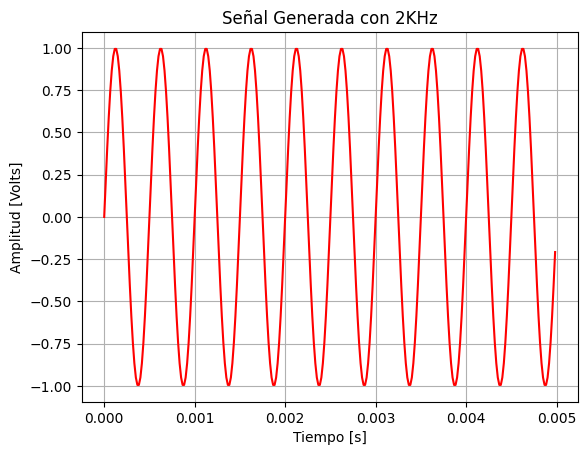

Señal 2KHz: Ts=0.000167 s, N=30, Energía=150J, Potencia=0.50W


In [40]:
tt, yy = generador_de_señales(1, 0, 2000, 0, 300, 60000)
plt.figure(1)
plt.plot(tt, yy, color='red') 
plt.title('Señal Generada con 2KHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.show()

E1 = energia(yy)
P1 = potencia(yy)

print("Señal 2KHz: Ts=%f s, N=%d, Energía=%dJ, Potencia=%.2fW" % (1/6000, 30, E1,P1))


*Misma señal amplificada y desfasada π/2*

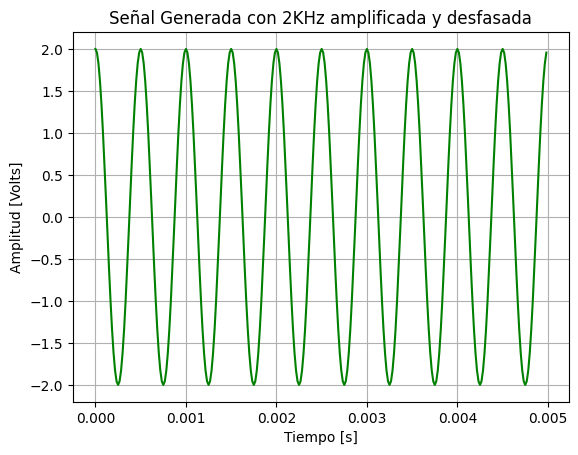

Señal 2KHz amplificada y desfasada: Ts=0.000167 s, N=30, Energía=599J, Potencia=2.00W


In [41]:
tt2, yy2 = generador_de_señales(2, 0, 2000, np.pi/2, 300, 60000)
plt.figure(1)
plt.plot(tt2, yy2, color='green') 
plt.title('Señal Generada con 2KHz amplificada y desfasada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.show()

E2 = energia(yy2)
P2 = potencia(yy2)

print("Señal 2KHz amplificada y desfasada: Ts=%f s, N=%d, Energía=%dJ, Potencia=%.2fW" % (1/6000, 30, E2, P2))

*Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.*

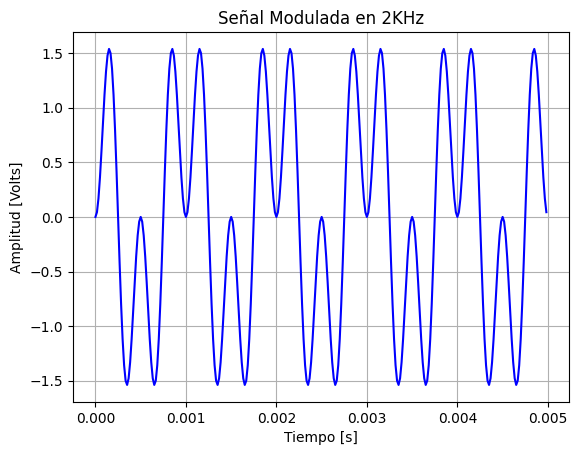

Señal modulada: Ts=0.000167 s, N=300, Energía=300J, Potencia=1.000W


In [42]:
yy_modular = modular(2, 0, 1000, 0, 300, 60000)
plt.figure(1)
plt.plot(tt, yy*yy_modular, color='blue') 
plt.title('Señal Modulada en 2KHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.show()

E3 = energia(yy*yy_modular)
P3 = potencia(yy*yy_modular)

print("Señal modulada: Ts=%f s, N=%d, Energía=%dJ, Potencia=%.3fW" % (1/6000, 300, E3, P3))

*Señal anterior recortada al 75% de su amplitud.*

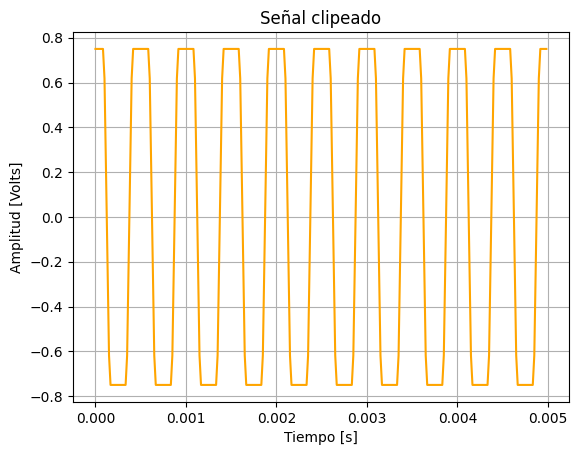

Señal 2KHz recortada al 0.75 en amplitud: Ts=0.000167 s, N=300, Energía=140J, Potencia=0.4693W


In [27]:
yy_clip = np.clip(yy2, -0.75, 0.75)
plt.figure(1)
plt.plot(tt2, yy_clip, color='orange') 
plt.title('Señal clipeado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.show()

E4 = energia(yy_clip)
P4 = potencia(yy_clip)

print("Señal 2KHz recortada al 0.75 en amplitud: Ts=%f s, N=%d, Energía=%dJ, Potencia=%.4fW" % (1/6000, 300, E4,P4))

*Una señal cuadrada de 4KHz.*

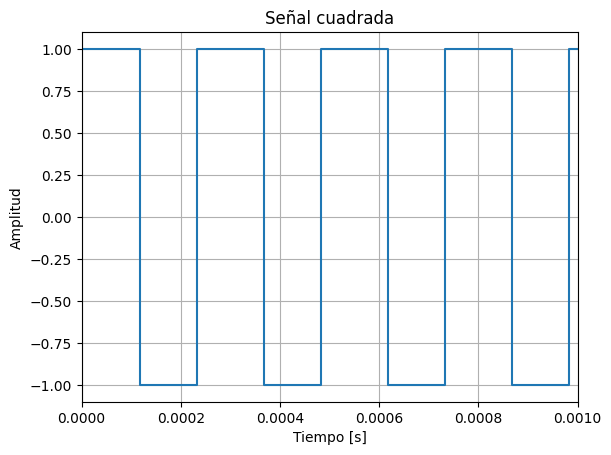

Señal cuadrada: Energía=300J, Potencia=0.4693W, Cantidad de muestras: 300


In [28]:
f_cuadrada = 4000 
fs_cuadrada = 60000      
N_cuadrada = 300        
t_cuadrada = np.arange(0, N_cuadrada/fs_cuadrada, 1/fs_cuadrada)
w0_cuadrada = 2 * np.pi * f_cuadrada
y_cuadrada = signal.square(w0_cuadrada*t_cuadrada)


plt.step(t_cuadrada,  y_cuadrada)
plt.xlim(0, 0.001) #grafico solo algunos periodos asi se ve bien
plt.title("Señal cuadrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

E5 = energia(y_cuadrada)
P5 = potencia(y_cuadrada)
print("Señal cuadrada: Energía=%dJ, Potencia=%.4fW, Cantidad de muestras: %d" % ( E5,P4, N_cuadrada))

*Un pulso rectángular de 10ms.*

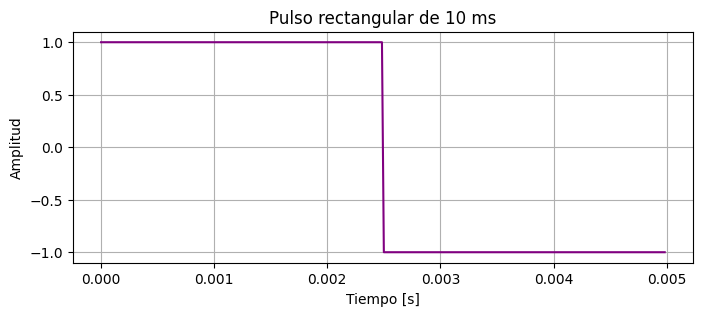

Pulso 10ms: Energía=300J, Cantidad de muestras:300, Ts:0.000017


In [34]:
#Uso los mismo valores que en la señal original
fs_pulso = 60000               
T_total = 0.005        
T_pulso = 0.01         
t_pulso = np.arange(0, T_total, 1/fs_pulso)
pulso = signal.square(2*np.pi*1/T_total*t_pulso)

N_pulso = fs_pulso*T_total

plt.figure(figsize=(8,3))
plt.plot(t_pulso, pulso, color='purple')
plt.title("Pulso rectangular de 10 ms")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

E4 =  energia(pulso) #al ser una señal finita tiene sentido calcular la energia 

print("Pulso 10ms: Energía=%dJ, Cantidad de muestras:%d, Ts:%f" % (E4,N_pulso, 1/fs_pulso))


### Parte 2

In [30]:
res1 = ortogonalidad(yy, yy2) #original con señal desfasada
res2 = ortogonalidad(yy, yy*yy_modular)#original con señal modulada
res3 = ortogonalidad(yy, yy_clip)#original con señal clippeada
res4 = ortogonalidad(yy, y_cuadrada)#original con señal cuadrada
res5 = ortogonalidad(yy, pulso)#original con pulso

Las señales son ortogonales
Las señales son ortogonales
Las señales son ortogonales
Las señales son ortogonales
Las señales son ortogonales


### Parte 3

**Un poco de teoría:**
La correlación en el procesamiento de señales es una medida de la similitud entre dos señales, frecuentemente usada para encontrar características relevantes en una señal desconocida por medio de la comparación con otra que sí se conoce. La fórmula para calcular esta medida es la siguiente: $$R_{xy}[m] = \sum_{n=-\infty}^{\infty} x[n] \, y^*[n+m]$$

Para analizar la correlación entre las señales armadas, utilicé la función de la librería Numpy denominada "correlate".




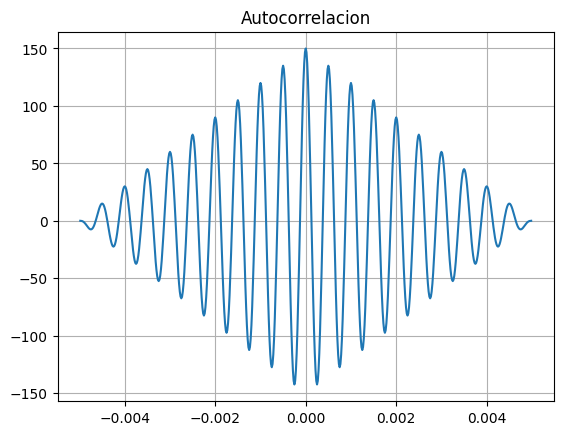

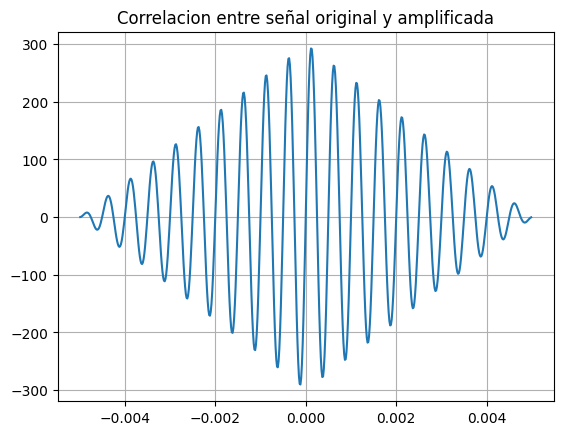

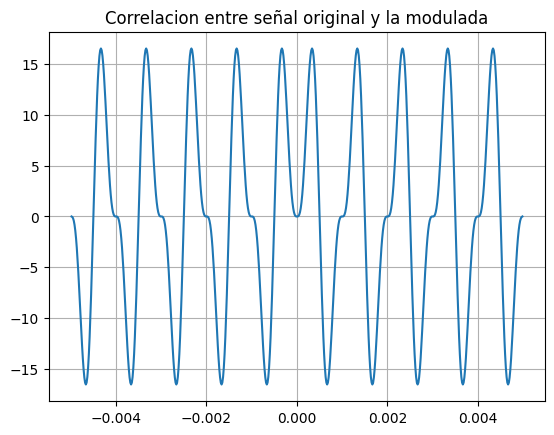

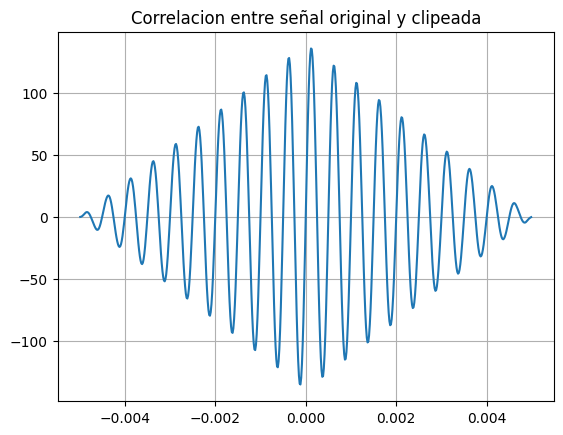

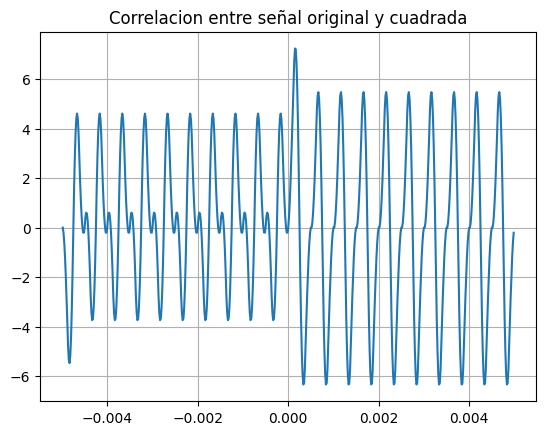

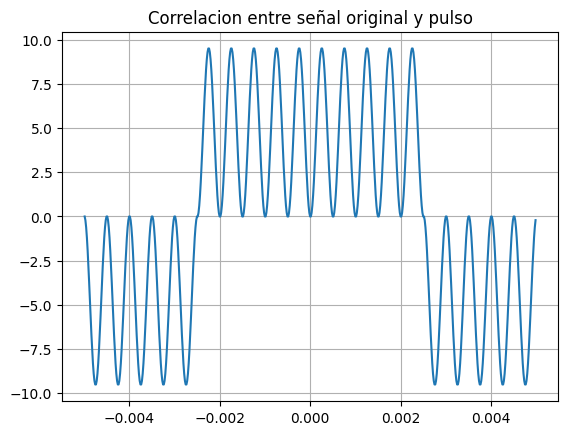

In [31]:
#Usar este link paera corregir lo del eje x, tengo que armarlo bien segun los lags
#https://stackoverflow.com/questions/69117617/how-to-find-the-lag-between-two-time-series-using-cross-correlation/69117736
lags = np.arange(-N+1, N)         # retardos en muestras
lags_t = lags * Ts


auto_corr = np.correlate(yy, yy, mode='full')
plt.plot(lags_t, auto_corr)
plt.title("Autocorrelacion")
plt.grid(True)
plt.show()
#Termina quedando la expresión de la energia en el autocorralate. 

corr_1= np.correlate(yy, yy2, mode='full')
plt.plot(lags_t, corr_1)
plt.title("Correlacion entre señal original y amplificada")
plt.grid(True)
plt.show()

corr_2 = np.correlate(yy, yy_modular, mode='full')
plt.plot(lags_t,corr_2)
plt.title("Correlacion entre señal original y la modulada")
plt.grid(True)
plt.show()

corr_3 = np.correlate(yy, yy_clip, mode='full')
plt.plot(lags_t,corr_3)
plt.title("Correlacion entre señal original y clipeada")
plt.grid(True)
plt.show()

corr_4 = np.correlate(yy, y_cuadrada, mode='full')
plt.plot(lags_t,corr_4)
plt.title("Correlacion entre señal original y cuadrada")
plt.grid(True)
plt.show()

corr_5 = np.correlate(yy, pulso, mode='full')
plt.plot(lags_t,corr_5)
plt.title("Correlacion entre señal original y pulso")
plt.grid(True)
plt.show()


### Parte 4

Igualdad demostrada!


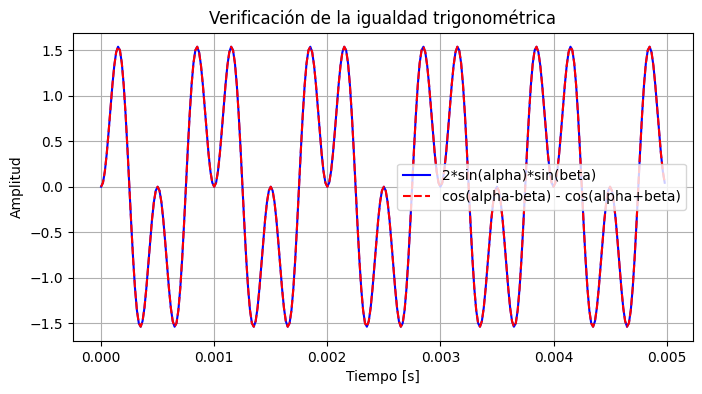

In [32]:
#uso los parametros de la señal original
f = 2000         
fs = 60000       
N = 300          
Ts = 1/fs
t = np.arange(0, N*Ts, Ts)
w = 2*np.pi*f


alpha = w*t
beta = alpha / 2  


izq = 2 * np.sin(alpha) * np.sin(beta)

der = np.cos(alpha - beta) - np.cos(alpha + beta)


if der.all() == izq.all():
    print("Igualdad demostrada!")
else:
    print("no se pudo verificar")

plt.figure(figsize=(8,4))
plt.plot(t, izq, label="2*sin(alpha)*sin(beta)", color='blue')
plt.plot(t, der, '--', label="cos(alpha-beta) - cos(alpha+beta)", color='red')
plt.title("Verificación de la igualdad trigonométrica")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

### Bonus

Para realizar el bonus, busqué cómo graficar una señal con extensión WAV. Mi referencia fue la siguiente página: https://stackoverflow.com/questions/18625085/how-to-plot-a-wav-file


/var/folders/2b/q5dd04h56l5c4nc9n5z59mbc0000gn/T/ipykernel_7201/561641786.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  input_data = read("bonus.wav")


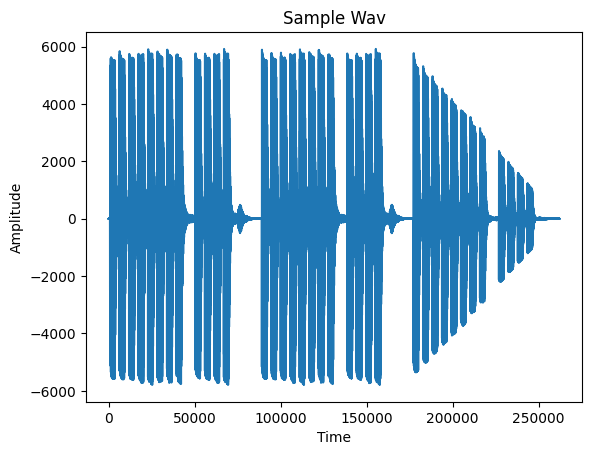

La energia de la señal es: 711915091 J


In [33]:
input_data = read("bonus.wav")
audio = input_data[1]
plt.plot(audio[:,0]) #aca estoy graficando todo el audio, fue lo unico que cambie del codigo que encontre en el foro
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")
# display the plot
plt.show()

energia_bonus = energia(audio)
print("La energia de la señal es:", energia_bonus, "J")

## Conclusiones
En este trabajo práctico se pudieron graficar diferentes tipos de señales y también una misma señal con algunos valores modificados. Se pudieron observar las diferencias de las mismas de forma gráfica y también al analizar su potencia y energía.

Algo interesante sobre la energía es que el valor depende de los valores de frecuencia y cantidad de muestras que tomo al armar la señal discreta. Al ser la sumatoria del módulo cuadrado de la señal, si yo tengo una mayor cantidad de muestras, la energía va a aumentar. Esto se pudo ver claramente en el ejercicio bonus, ya que si comparamos el valor de energía que dio al analizar esa señal que contiene más muestras que las demás, es un valor mucho mayor. Por lo tanto, la energía termina siendo un valor bastante relativo.

En cuanto a la ortogonalidad los resultados son relativos al intervalo de 5 ms de señal que estoy analizando (el intervalo depende de N=300, fs=60 kHz). Probe cambiando los valores de la frecuencia de muestreo y la cantidad de muestras y al aplicarle la funcion de ortogonalidad, dejaban de devolver que son ortogonales la mayoria de las señales con la original. El unico caso que siempre se cumple ortogonalidad es en el caso de la señal original con la misma señal defasada en π/2. Por identidades trogonometricas sabemos que $\sin(\theta + \frac{\pi}{2}) = \cos(\theta)$ y su producto interno en este caso da cero, por lo tanto son ortogonales. Esto coincide con la teoría de que seno y coseno de *misma frecuencia* son ortogonales en un número entero de muestras que cubran períodos completos.

Se pudo observar, además, cuán similares son estas señales entre sí al calcular la correlación entre las mismas.

## Autoevaluación de aprendizaje

**Indicar una opción:**

* Resolví la tarea con seguridad
* Resolví la tarea, pero tengo dudas ✅
* Resolví la tarea, pero no entendí bien
* No pude resolverla y no entendí

Responder:

**¿Qué aprendiste al hacer esta tarea?**

Aprendí a poner en práctica conceptos que venía aprendiendo en estos primeros tres años de carrera. Por ejemplo, el concepto de ortogonalidad: conceptualmente siempre supe qué es, que es el producto interno entre dos cosas y que si da cero es ortogonal. Pero plantearlo en código me ayudó a bajarlo a tierra. Lo mismo con los conceptos de periodos, frecuencias, etc. Son cosas que siempre usé para resolver problemas muy ambiguos, y al ponerlos en práctica, pensando qué valores me conviene tomar para ver mejor la gráfica o cuáles tiene sentido tomar, me ayudó a internalizarlo más.

**¿Qué te quedó claro? ¿Qué te sigue costando?**

La parte de armar señales, entender qué valores tomar y jugar con eso, siento que me quedó clara. Lo que no termino de entender bien es cuándo me conviene analizar potencia o energía; por lo que estuve investigando, cuando tengo una señal finita conviene calcular energía, pero no termino de entender en qué casos una señal no sería finita. En este TP, por lo que interpreto, en todas me convendría calcular energía ya que son todas finitas. Creo que es la parte más floja de mi TP.
Otra cosa que no me queda del todo clara es cómo interpretar los gráficos de la correlación; no los termino de entender y no podría predecirlos.

**Indicar si se utilizó IA:**

* Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra. ✅
* No usé IA.

**En caso afirmativo, indicar una opción o varias:**

* Escritura ❌
* Código ✅ → Lo usé para escribir el LaTeX de las fórmulas, cuando me surgían errores, o para entender más en profundidad qué hacían algunas funciones de Python. De todas formas, para el desarrollo de los códigos usé mucho las páginas de GeeksforGeeks y Stack Overflow. También la documentación oficial de las librerías de Python.
* Conceptos teóricos ✅ → Si bien estuve leyendo el Holton para el desarrollo de los TPS, algunos conceptos no me terminaban de quedar del todo claros, por lo que me ayudé con chatGPT.
* Gráficos ❌
* Conclusiones ❌

### Referencias
- https://blog.espol.edu.ec/telg1001/senales-de-energia-y-potencia/
- https://stackoverflow.com/questions/18625085/how-to-plot-a-wav-file
  